In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jun-2022/data.csv


In [2]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-jun-2022/data.csv')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-jun-2022/sample_submission.csv')

In [3]:
df

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,-0.823740,0.285673,0.343307,-0.436747,1.700549,-1.069432,0.819698,-0.168457,-0.429074,...,1.799592,-0.301352,5.339675,-0.991529,1.279494,-0.841051,-2.276500,1.762961,5.324553,-0.228733
999996,999996,-0.769106,-0.387363,-1.227469,0.601183,0.351161,0.219475,-0.530277,0.853452,0.608646,...,1.909697,-1.299360,-0.071713,-0.162173,0.072501,-0.614687,-1.265524,0.190385,-0.344112,-0.346807
999997,999997,0.147534,-0.715276,-0.465049,-1.988941,-1.594535,-1.044882,3.159455,-0.634108,0.890382,...,2.891854,3.105002,-3.470520,NaN,0.096988,0.569255,3.609790,-0.584108,-1.492096,-0.997502
999998,999998,-1.709886,-0.813785,-1.866536,-0.179420,2.231478,1.460122,-0.220585,-0.118496,-0.140064,...,-1.135003,-5.127360,-3.903728,-1.597023,0.893159,0.379434,0.846266,-1.085554,3.122423,0.004831


In [4]:
submission

,row-col,value
0,0-F_1_14,0.0
1,0-F_3_23,0.0
2,1-F_3_24,0.0
3,2-F_1_2,0.0
4,2-F_4_2,0.0
...,...,...
999995,999993-F_4_2,0.0
999996,999994-F_3_10,0.0
999997,999994-F_4_9,0.0
999998,999997-F_3_14,0.0


In [5]:
df.columns[df.isnull().any()==0]

Index(['row_id', 'F_2_0', 'F_2_1', 'F_2_2', 'F_2_3', 'F_2_4', 'F_2_5', 'F_2_6',
       'F_2_7', 'F_2_8', 'F_2_9', 'F_2_10', 'F_2_11', 'F_2_12', 'F_2_13',
       'F_2_14', 'F_2_15', 'F_2_16', 'F_2_17', 'F_2_18', 'F_2_19', 'F_2_20',
       'F_2_21', 'F_2_22', 'F_2_23', 'F_2_24'],
      dtype='object')

In [6]:
df.columns[df.isnull().any()==1]

Index(['F_1_0', 'F_1_1', 'F_1_2', 'F_1_3', 'F_1_4', 'F_1_5', 'F_1_6', 'F_1_7',
       'F_1_8', 'F_1_9', 'F_1_10', 'F_1_11', 'F_1_12', 'F_1_13', 'F_1_14',
       'F_3_0', 'F_3_1', 'F_3_2', 'F_3_3', 'F_3_4', 'F_3_5', 'F_3_6', 'F_3_7',
       'F_3_8', 'F_3_9', 'F_3_10', 'F_3_11', 'F_3_12', 'F_3_13', 'F_3_14',
       'F_3_15', 'F_3_16', 'F_3_17', 'F_3_18', 'F_3_19', 'F_3_20', 'F_3_21',
       'F_3_22', 'F_3_23', 'F_3_24', 'F_4_0', 'F_4_1', 'F_4_2', 'F_4_3',
       'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7', 'F_4_8', 'F_4_9', 'F_4_10',
       'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14'],
      dtype='object')

In [7]:
df.columns

Index(['row_id', 'F_1_0', 'F_1_1', 'F_1_2', 'F_1_3', 'F_1_4', 'F_1_5', 'F_1_6',
       'F_1_7', 'F_1_8', 'F_1_9', 'F_1_10', 'F_1_11', 'F_1_12', 'F_1_13',
       'F_1_14', 'F_2_0', 'F_2_1', 'F_2_2', 'F_2_3', 'F_2_4', 'F_2_5', 'F_2_6',
       'F_2_7', 'F_2_8', 'F_2_9', 'F_2_10', 'F_2_11', 'F_2_12', 'F_2_13',
       'F_2_14', 'F_2_15', 'F_2_16', 'F_2_17', 'F_2_18', 'F_2_19', 'F_2_20',
       'F_2_21', 'F_2_22', 'F_2_23', 'F_2_24', 'F_3_0', 'F_3_1', 'F_3_2',
       'F_3_3', 'F_3_4', 'F_3_5', 'F_3_6', 'F_3_7', 'F_3_8', 'F_3_9', 'F_3_10',
       'F_3_11', 'F_3_12', 'F_3_13', 'F_3_14', 'F_3_15', 'F_3_16', 'F_3_17',
       'F_3_18', 'F_3_19', 'F_3_20', 'F_3_21', 'F_3_22', 'F_3_23', 'F_3_24',
       'F_4_0', 'F_4_1', 'F_4_2', 'F_4_3', 'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7',
       'F_4_8', 'F_4_9', 'F_4_10', 'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14'],
      dtype='object')

In [8]:
col1 = ['row_id','F_2_0','F_2_1','F_2_2','F_2_3','F_2_4','F_2_5','F_2_6','F_2_7','F_2_8','F_2_9','F_2_10','F_2_11','F_2_12','F_2_13','F_2_14', 'F_2_15', 'F_2_16', 'F_2_17', 'F_2_18', 'F_2_19', 'F_2_20','F_2_21', 'F_2_22', 'F_2_23', 'F_2_24']
data = df[col1]

In [9]:
data

,row_id,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,...,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24
0,0,2,2,0,3,2,1,1,3,2,...,1,0,1,0,2,1,2,0,1,2
1,1,3,5,2,1,4,2,3,2,0,...,2,1,0,1,1,1,1,3,2,5
2,2,3,2,1,3,2,1,0,6,1,...,1,2,2,4,8,1,5,1,2,4
3,3,2,3,2,1,1,1,2,0,6,...,3,1,2,1,2,6,2,1,0,2
4,4,5,0,1,3,3,0,2,5,1,...,0,2,3,2,5,2,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,4,8,1,4,4,0,1,1,2,...,1,1,1,2,2,3,0,3,0,6
999996,999996,0,1,1,5,2,1,4,1,1,...,2,2,0,2,0,3,4,3,0,2
999997,999997,5,3,1,2,1,0,1,0,0,...,2,1,1,2,0,0,1,2,0,4
999998,999998,0,5,0,2,4,0,0,0,3,...,1,6,0,1,3,2,1,3,0,2


In [10]:
col2 = ['row_id','F_1_0', 'F_1_1', 'F_1_2', 'F_1_3', 'F_1_4', 'F_1_5', 'F_1_6', 'F_1_7',
       'F_1_8', 'F_1_9', 'F_1_10', 'F_1_11', 'F_1_12', 'F_1_13', 'F_1_14',
       'F_3_0', 'F_3_1', 'F_3_2', 'F_3_3', 'F_3_4', 'F_3_5', 'F_3_6', 'F_3_7',
       'F_3_8', 'F_3_9', 'F_3_10', 'F_3_11', 'F_3_12', 'F_3_13', 'F_3_14',
       'F_3_15', 'F_3_16', 'F_3_17', 'F_3_18', 'F_3_19', 'F_3_20', 'F_3_21',
       'F_3_22', 'F_3_23', 'F_3_24', 'F_4_0', 'F_4_1', 'F_4_2', 'F_4_3',
       'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7', 'F_4_8', 'F_4_9', 'F_4_10',
       'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14']
train = df[col2]

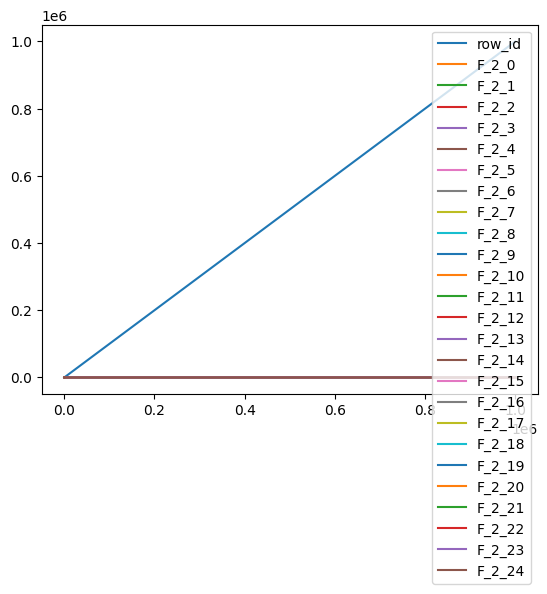

In [11]:
import matplotlib.pyplot as plt
data.plot()
plt.show()